<a href="https://colab.research.google.com/github/Hamid-Mofidi/Diffusion-Models/blob/main/GMM_noising/MNIST_dateset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml

**GaussianMixture:** It's a class in scikit-learn representing a Gaussian Mixture Model, commonly used for clustering. You can fit this model to data using the Expectation-Maximization algorithm.

**make_blobs:** It's a function that generates isotropic Gaussian blobs for clustering and classification tasks. It's often used for creating synthetic datasets for testing machine learning algorithms.

In [2]:
# Parameters for generating Gaussian distributions
#n_clusters = 4
#n_samples_per_cluster = int(10000 / n_clusters)
#n_features = 1
#cluster_std_range = [0.5, 1]
#print(len(cluster_std_range))

In [3]:
def MNIST_dataset(random_seed=42):
    # Set NumPy random seed
    np.random.seed(random_seed)

    # Load MNIST dataset
    mnist = fetch_openml('mnist_784', version=1)
    X, y = mnist.data, mnist.target.astype(int)

    # Select a subset of the data (e.g., first 10,000 samples)
    subset_size = 10000
    X_subset, y_subset = X[:subset_size], y[:subset_size]

    return X_subset, y_subset

In [4]:
def plot_gaussian_distributions(X, y, n_clusters):
    # Plot histograms with different colors for each cluster
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
    for label, color in zip(np.unique(y), colors):
        idx = np.where(y == label)[0]
        x_idx = X.iloc[idx, :].to_numpy()
        plt.hist(x_idx, alpha=0.5, color=color, label=f'Cluster {label}')

    plt.grid('both')
    plt.legend()
    plt.title(f'Histograms of {n_clusters} Gaussian Distributions')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

    return colors



In [5]:
def add_noise(X, diffusion_steps, eps):
    X_noised = X.copy()
    for _ in range(diffusion_steps):
        noise = np.random.normal(size=X.shape)
        X_noised += eps * noise
    return X_noised

In [6]:
def plot_noised_histograms(X_noised, y, colors):
    for label, color in zip(np.unique(y), colors):
        idx = np.where(y == label)[0]
        x_idx = X_noised[idx, :]  # Use NumPy array indexing to extract the rows
        plt.hist(x_idx, alpha=0.2, color=color)

    plt.grid('both')
    plt.show()

In [7]:
# Load MNIST data
X, y = MNIST_dataset(random_seed=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

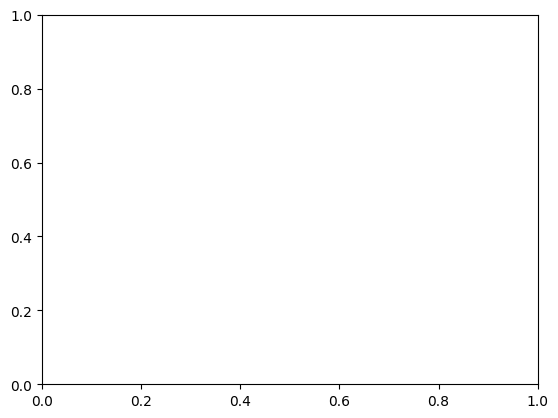

In [8]:
diffusion_steps = 20
eps = 1e-2

# Add noise to the data

X_noised = add_noise(X, diffusion_steps, eps)
#X_noised = X_noised.to_numpy()
# Plot histograms with noise
n_clusters = len(np.unique(y))
colors = plot_gaussian_distributions(X_noised, y, n_clusters)
plot_noised_histograms(X_noised, y, colors)



In [ ]:
# Add noise to the data
diffusion_steps = 500
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

In [ ]:
# Add noise to the data
diffusion_steps = 2000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

In [ ]:
# Add noise to the data
diffusion_steps = 20000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

In [ ]:
# Add noise to the data
diffusion_steps = 100000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)